# Stance Detection for the Fake News Challenge

## Identifying Textual Relationships with Deep Neural Nets



## Step1: Load the given dataset  

1. Mount the google drive

2. Import Glove embeddings

3. Import the test and train datasets


### Mount the google drive to access required project files

Run the below commands

In [0]:
from google.colab import drive


In [4]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Path for Project files on google drive



In [0]:
project_path = "/content/drive/My Drive/Colab Notebooks/Fake News Challenge/"

### Loading the Glove Embeddings

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'glove.6B.zip', 'r') as z:
  z.extractall()

# Load the dataset [5 Marks]

1. Using [read_csv()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) in pandas load the given train datasets files **`train_bodies.csv`** and **`train_stances.csv`**

2. Using [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) command in pandas merge the two datasets based on the Body ID. 

Note: Save the final merged dataset in a dataframe with name **`dataset`**.

In [0]:
import pandas as pd
trainbodies = pd.read_csv(project_path +'train_bodies.csv')

In [8]:
trainbodies.head()

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...


In [0]:
trainstance = pd.read_csv(project_path + 'train_stances.csv')

In [10]:
trainstance.head()

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,disagree


Merging the trainbodies and traininstance on Body ID

In [0]:
dataset = pd.merge(trainbodies,trainstance,how = 'inner',on = 'Body ID')

In [17]:
dataset.shape

(49972, 4)

In [16]:
dataset.head()

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",unrelated
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,unrelated
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,unrelated
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,unrelated


**Otained the required output after reding the Dataset**


<h2> Check1:</h2>
  
<h3> You should see the below output if you run `dataset.head()` command as given below </h3>

In [14]:
dataset.head()

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",unrelated
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,unrelated
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,unrelated
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,unrelated


In [19]:

dataset['articleBody']

0        A small meteorite crashed into a wooded area i...
1        A small meteorite crashed into a wooded area i...
2        A small meteorite crashed into a wooded area i...
3        A small meteorite crashed into a wooded area i...
4        A small meteorite crashed into a wooded area i...
                               ...                        
49967    ANN ARBOR, Mich. – A pizza delivery man in Mic...
49968    ANN ARBOR, Mich. – A pizza delivery man in Mic...
49969    ANN ARBOR, Mich. – A pizza delivery man in Mic...
49970    ANN ARBOR, Mich. – A pizza delivery man in Mic...
49971    ANN ARBOR, Mich. – A pizza delivery man in Mic...
Name: articleBody, Length: 49972, dtype: object

## Step2: Data Pre-processing and setting some hyper parameters needed for model


#### Run the code given below to set the required parameters.

1. `MAX_SENTS` = Maximum no.of sentences to consider in an article.

2. `MAX_SENT_LENGTH` = Maximum no.of words to consider in a sentence.

3. `MAX_NB_WORDS` = Maximum no.of words in the total vocabualry.

4. `MAX_SENTS_HEADING` = Maximum no.of sentences to consider in a heading of an article.

In [0]:
MAX_NB_WORDS = 30000
MAX_SENTS = 20
MAX_SENTS_HEADING = 1
MAX_SENT_LENGTH = 20
VALIDATION_SPLIT = 0.2

### Download the `Punkt` from nltk using the commands given below. This is for sentence tokenization.

For more info on how to use it, read [this](https://stackoverflow.com/questions/35275001/use-of-punktsentencetokenizer-in-nltk).



In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Tokenizing the text and loading the pre-trained Glove word embeddings for each token  [5 marks] 

Keras provides [Tokenizer API](https://keras.io/preprocessing/text/) for preparing text. Read it before going any further.

#### Import the Tokenizer from keras preprocessing text

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Flatten

In [0]:
import keras
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import sent_tokenize


#### Initialize the Tokenizer class with maximum vocabulary count as `MAX_NB_WORDS` initialized at the start of step2. 

In [0]:
keras.preprocessing.text.Tokenizer(num_words = MAX_NB_WORDS, filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',oov_token = 0)
t = Tokenizer()

#### Now, using fit_on_texts() from Tokenizer class, lets encode the data 

Note: We need to fit articleBody and Headline also to cover all the words.

In [0]:
t.fit_on_texts(dataset['articleBody'])

In [0]:
t.fit_on_texts(dataset['Headline'])

#### fit_on_texts() gives the following attributes in the output as given [here](https://faroit.github.io/keras-docs/1.2.2/preprocessing/text/).

* **word_counts:** dictionary mapping words (str) to the number of times they appeared on during fit. Only set after fit_on_texts was called.

* **word_docs:** dictionary mapping words (str) to the number of documents/texts they appeared on during fit. Only set after fit_on_texts was called.

* **word_index:** dictionary mapping words (str) to their rank/index (int). Only set after fit_on_texts was called.

* **document_count:** int. Number of documents (texts/sequences) the tokenizer was trained on. Only set after fit_on_texts or fit_on_sequences was called.



### Now, tokenize the sentences using nltk sent_tokenize() and encode the senteces with the ids we got form the above `t.word_index`

Initialise 2 lists with names `texts` and `articles`.

```
texts = [] to store text of article as it is.

articles = [] split the above text into a list of sentences.
```

In [0]:
texts = []
articles = []

In [0]:
 for i, row in dataset.iterrows():
   texts.append(row['articleBody'])
   articles.append(sent_tokenize(row['articleBody']))
 

In [29]:
texts[0]

'A small meteorite crashed into a wooded area in Nicaragua\'s capital of Managua overnight, the government said Sunday. Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city\'s airport, the Associated Press reports. \n\nGovernment spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a "relatively small" meteorite that "appears to have come off an asteroid that was passing close to Earth." House-sized asteroid 2014 RC, which measured 60 feet in diameter, skimmed the Earth this weekend, ABC News reports. \nMurillo said Nicaragua will ask international experts to help local scientists in understanding what happened.\n\nThe crater left by the meteorite had a radius of 39 feet and a depth of 16 feet,  said Humberto Saballos, a volcanologist with the Nicaraguan Institute of Territorial Studies who was on the committee. He said it is still not clear if the meteorite disintegrated or was buried.\n\nHumbe

In [30]:
articles[0]

["A small meteorite crashed into a wooded area in Nicaragua's capital of Managua overnight, the government said Sunday.",
 "Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city's airport, the Associated Press reports.",
 'Government spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a "relatively small" meteorite that "appears to have come off an asteroid that was passing close to Earth."',
 'House-sized asteroid 2014 RC, which measured 60 feet in diameter, skimmed the Earth this weekend, ABC News reports.',
 'Murillo said Nicaragua will ask international experts to help local scientists in understanding what happened.',
 'The crater left by the meteorite had a radius of 39 feet and a depth of 16 feet,  said Humberto Saballos, a volcanologist with the Nicaraguan Institute of Territorial Studies who was on the committee.',
 'He said it is still not clear if the meteorite disintegrated or was bu

FIRST ELEMENTS OF ARTICLES AND TEXTS MATCH THE REQUIRED OUTPUT

## Check 2:

first element of texts and articles should be as given below. 

In [31]:
texts[0]

'A small meteorite crashed into a wooded area in Nicaragua\'s capital of Managua overnight, the government said Sunday. Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city\'s airport, the Associated Press reports. \n\nGovernment spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a "relatively small" meteorite that "appears to have come off an asteroid that was passing close to Earth." House-sized asteroid 2014 RC, which measured 60 feet in diameter, skimmed the Earth this weekend, ABC News reports. \nMurillo said Nicaragua will ask international experts to help local scientists in understanding what happened.\n\nThe crater left by the meteorite had a radius of 39 feet and a depth of 16 feet,  said Humberto Saballos, a volcanologist with the Nicaraguan Institute of Territorial Studies who was on the committee. He said it is still not clear if the meteorite disintegrated or was buried.\n\nHumbe

In [32]:
articles[0]

["A small meteorite crashed into a wooded area in Nicaragua's capital of Managua overnight, the government said Sunday.",
 "Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city's airport, the Associated Press reports.",
 'Government spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a "relatively small" meteorite that "appears to have come off an asteroid that was passing close to Earth."',
 'House-sized asteroid 2014 RC, which measured 60 feet in diameter, skimmed the Earth this weekend, ABC News reports.',
 'Murillo said Nicaragua will ask international experts to help local scientists in understanding what happened.',
 'The crater left by the meteorite had a radius of 39 feet and a depth of 16 feet,  said Humberto Saballos, a volcanologist with the Nicaraguan Institute of Territorial Studies who was on the committee.',
 'He said it is still not clear if the meteorite disintegrated or was bu

# Now iterate through each article and each sentence to encode the words into ids using t.word_index  [5 marks] 

Here, to get words from sentence you can use `text_to_word_sequence` from keras preprocessing text.

1. Import text_to_word_sequence

2. Initialize a variable of shape (no.of articles, MAX_SENTS, MAX_SENT_LENGTH) with name `data` with zeros first (you can use numpy [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) to initialize with all zeros)and then update it while iterating through the words and sentences in each article.

In [0]:
from keras.preprocessing import text
from keras.preprocessing.sequence import pad_sequences
import numpy as np
MAX_SENT_LENGTH = 20
MAX_SENTS = 20
NUM_ARTICLES = dataset.shape[0]

In [0]:
data = np.zeros(shape = (NUM_ARTICLES,MAX_SENTS,MAX_SENT_LENGTH), dtype = 'int32')

In [35]:
data.shape

(49972, 20, 20)

### Limiting the maximum number of sentences in an article to 20

In [0]:
final_articles = articles
for i,row in dataset.iterrows():
  if len(articles[i])>MAX_SENTS:
     final_articles[i]=articles[i][:20]


In [0]:
length = []
for i,row in dataset.iterrows():
  length.append(len(final_articles[i]))

### Limiting the maximum number of sentences in an article to 20 

In [0]:

for i in range(len(dataset)):
  for j in range(len(articles[i])):
    word_tokens = text.text_to_word_sequence(final_articles[i][j], lower = False) ## Obtaining words from each sentence
    X = [[t.word_index[word.lower()] for word in word_tokens] for sent in final_articles[i]] ## tokenizing the word of each sentence using t.word_index
    truncated = pad_sequences(X, maxlen = MAX_SENT_LENGTH, padding = 'post', truncating='post')  ## Padding the sentence
    data[i,j,:] = truncated[j,:]  ## Updating the "data" array with tokens
    

In [39]:
(articles[196])

['There is so much fake stuff on the Internet in any given week that we’ve grown tired of debunking it all.',
 'Fake Twitter fights.',
 'Fake DHL ads.',
 'Amazing viral video?',
 'Nope — a Jimmy Kimmel stunt!',
 'So, rather than take down each and every undeservedly viral story that crosses our monitors each week, we’re rounding them all up in a quick, once-a-week Friday debunk of fake photos, misleading headlines and bad studies that you probably shouldn’t share over the weekend.',
 'Ready?',
 'Here’s what was fake on the Internet this week:\n\n1.',
 'The Nobel Committee doesn’t “regret” giving President Obama the Peace Prize.',
 'According to an invented “news release” uploaded to Scribd by the prominent blogger and anti-war activist David Swanson, the Nobel Institute can’t retract Obama’s 2009 Peace Prize — but wishes it could.',
 '“It remains the obligation of the Committee to disassociate itself from actions taken by laureates that frustrate rather than advancing [sic] the fratern

In [40]:
data[196,:,:]

array([[   61,     8,    83,   268,   457,  2896,    10,     1,   420,
            5,    98,   423,   169,     7,  2327,  2752,  4807,     4,
         4737,    15],
       [  457,   148,  6905,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [  457, 16399,  3069,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [ 2272,   783,    43,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [ 8165,    91,     3,  5470, 16400,  4282,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   83,  1197,   102,   281,   193,   401,     6,   644, 16401,
          783,   112,     7, 15392,   131,  3764,   401,   169,  1665,
        16402,    94],
       [ 1

In [41]:
data[0,:,:]

array([[    3,   481,   427,  7211,    81,     3,  3733,   331,     5,
         3891,   350,     4,  1431,  2958,     1,    89,    12,   464,
            0,     0],
       [  758,    95,  1047,     3,  2679,  1752,     7,   189,     3,
         1217,  1075,  2030,   700,   159,     1,  3032,   448,     1,
          555,   235],
       [   89,  1067,  4115,  2349,    12,     3,  1092,  3306,    19,
            1,    89,     2,  1793,     1,   521,  2009,    15,     9,
            3,  3111],
       [  181,  3640,   972,   200,  2556,    44,  6775,  1722,  1252,
            5, 13317, 17936,     1,   778,    31,   740,  3990,    67,
           85,     0],
       [ 2349,    12,  1557,    38,  1094,   351,   775,     2,   367,
          260,  1770,     5,  4450,    70,   494,     0,     0,     0,
            0,     0],
       [    1,   700,   189,    19,     1,   427,    32,     3,  7417,
            4,  2159,  1252,     6,     3,  5270,     4,  1217,  1252,
           12,  3363],
       [  

#### **The FIRST element of "data" array matches the output required**

### Check 3:

Accessing first element in data should give something like given below.

In [42]:
data[0, :, :]

array([[    3,   481,   427,  7211,    81,     3,  3733,   331,     5,
         3891,   350,     4,  1431,  2958,     1,    89,    12,   464,
            0,     0],
       [  758,    95,  1047,     3,  2679,  1752,     7,   189,     3,
         1217,  1075,  2030,   700,   159,     1,  3032,   448,     1,
          555,   235],
       [   89,  1067,  4115,  2349,    12,     3,  1092,  3306,    19,
            1,    89,     2,  1793,     1,   521,  2009,    15,     9,
            3,  3111],
       [  181,  3640,   972,   200,  2556,    44,  6775,  1722,  1252,
            5, 13317, 17936,     1,   778,    31,   740,  3990,    67,
           85,     0],
       [ 2349,    12,  1557,    38,  1094,   351,   775,     2,   367,
          260,  1770,     5,  4450,    70,   494,     0,     0,     0,
            0,     0],
       [    1,   700,   189,    19,     1,   427,    32,     3,  7417,
            4,  2159,  1252,     6,     3,  5270,     4,  1217,  1252,
           12,  3363],
       [  

# Repeat the same process for the `Headings` as well. Use variables with names `texts_heading` and `articles_heading` accordingly. [5 marks] 

In [0]:
texts_heading = []
articles_heading = []

In [0]:
for i, rows in dataset.iterrows():
  texts_heading.append(rows['Headline'])
  articles_heading.append(sent_tokenize(rows['Headline']))

In [45]:

texts_heading[10]

'Surreal Photos of Fisherman’s Jaw-Dropping Catch Will Likely Have People Wondering If It’s Real'

In [46]:
articles_heading[10]

['Surreal Photos of Fisherman’s Jaw-Dropping Catch Will Likely Have People Wondering If It’s Real']

In [0]:
data_heading = np.zeros(shape = (NUM_ARTICLES,MAX_SENTS_HEADING,MAX_SENT_LENGTH), dtype = 'int32')

In [48]:
data_heading.shape

(49972, 1, 20)

In [0]:
for i in range(len(dataset)):
  for j in range(MAX_SENTS_HEADING):
    word_tokens_heading = text.text_to_word_sequence(articles_heading[i][j], lower = False) ## Obtaining words from each sentence
    X_heading = [[t.word_index[word.lower()] for word in word_tokens_heading] for sent in articles_heading[i]] ## Tokenizing the word of each sentece using t.word_index
    truncated_heading = pad_sequences(X_heading, maxlen = MAX_SENT_LENGTH, padding = 'post', truncating='post') ## Padding the sentence to required length
    data_heading[i,j,:] = truncated_heading[j,:] ## Updating the "data_heading" with the tokens
    

In [50]:
(articles_heading[0][0])

'Soldier shot, Parliament locked down after gunfire erupts at war memorial'

In [51]:
data_heading[0,:,:]

array([[  718,   206,   343,  7134,   193,    34,  1338, 11554,    21,
          233,   686,     0,     0,     0,     0,     0,     0,     0,
            0,     0]], dtype=int32)

### Now the features are ready, lets make the labels ready for the model to process.

### Convert labels into one-hot vectors

You can use [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) in pandas to create one-hot vectors.

In [0]:
import pandas as pd
labels = pd.get_dummies(dataset['Stance'])
labels =  labels.to_numpy(dtype = 'int32')

In [53]:
labels[10]

array([0, 0, 0, 1], dtype=int32)

In [64]:
print('Shape of the data tensor', data.shape)
print('Shape of label tensor', labels.shape)

Shape of the data tensor (49972, 20, 20)
Shape of label tensor (49972, 4)


###The Shape of data and label tensors matches the required shape

### Check 4:

The shape of data and labels shoould match the given below numbers.

In [56]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (49972, 20, 20)
Shape of label tensor: (49972, 4)


### Shuffle the data

In [0]:
## get numbers upto no.of articles
indices = np.arange(data.shape[0])
## shuffle the numbers
np.random.shuffle(indices)

In [0]:
## shuffle the data
data = data[indices]
data_heading = data_heading[indices]
## shuffle the labels according to data
labels = labels[indices]

### Split into train and validation sets. Split the train set 80:20 ratio to get the train and validation sets.


Use the variable names as given below:

x_train, x_val - for body of articles.

x-heading_train, x_heading_val - for heading of articles.

y_train - for training labels.

y_val - for validation labels.



In [0]:
validation_split = 0.2

In [0]:
val_samples = int(validation_split * data.shape[0])



In [0]:
x_train = data[:-val_samples]
x_heading_train = data_heading[:-val_samples]
y_train = labels[:-val_samples]
x_val = data[-val_samples:]
x_heading_val = data_heading[-val_samples:]
y_val = labels[-val_samples:]

In [63]:
print(x_train.shape)
print(x_heading_train.shape)
print(y_train.shape)

print(x_val.shape)
print(x_heading_val.shape)
print(y_val.shape)

(39978, 20, 20)
(39978, 1, 20)
(39978, 4)
(9994, 20, 20)
(9994, 1, 20)
(9994, 4)


### The Shape of the train and validation datasets matches the shapes specified

### Check 5:

The shape of x_train, x_val, y_train and y_val should match the below numbers.

In [56]:
print(x_train.shape)
print(x_heading_train.shape)
print(y_train.shape)

print(x_val.shape)
print(x_heading_val.shape)
print(y_val.shape)

(39978, 20, 20)
(39978, 1, 20)
(39978, 4)
(9994, 20, 20)
(9994, 1, 20)
(9994, 4)


### Reshaping the Train and Test split to 2D array to use as input to the Model

In [0]:
X_train = np.reshape(x_train, (39978,400))
X_heading_train = np.reshape(x_heading_train, (39978,20))
X_val = np.reshape(x_val, (9994,400))
X_heading_val = np.reshape(x_heading_val,(9994,20))


In [0]:
maxlen_articlebody = MAX_SENT_LENGTH * MAX_SENTS
maxlen_headline = MAX_SENT_LENGTH * MAX_SENTS_HEADING

### Create embedding matrix with the glove embeddings


Run the below code to create embedding_matrix which has all the words and their glove embedding if present in glove word list.

In [59]:
embedding_dim = 100
import numpy as np
# load the whole embedding into memory
embeddings_index = dict()
f = open('./glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))



Loaded 400000 word vectors.


In [0]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((MAX_NB_WORDS, embedding_dim))


for word, i in t.word_index.items():
	if i<MAX_NB_WORDS:
		embedding_vector = embeddings_index.get(word)
		if embedding_vector is not None:
			embedding_matrix[i] = embedding_vector

In [61]:
embedding_matrix.shape

(30000, 100)

# Try the sequential model approach and report the accuracy score. [10 marks]  

### Import layers from Keras to build the model

In [1]:
embedding_dim = 100
classes = 4

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import LSTM,Embedding,Bidirectional, Concatenate,Reshape, Activation, Dot
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from keras import Model,Input
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard, LearningRateScheduler
from keras.callbacks import Callback

Using TensorFlow backend.


DEFINING CHECKPOINTS AND CALLBACKS

In [0]:
checkpoints= ModelCheckpoint("Stance Detection.h5", monitor="accuracy", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="max", period=2) # Checkpoint best validation model
PATIENCE = 20

stop = EarlyStopping(monitor="val_acc", patience=PATIENCE, mode="max") # Stop early, if the validation error deteriorates
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=10, min_lr=1e-7, verbose=1, mode="max")




### MODELLING WITH SINGLE LSTM LAYER IN BOTH ENCODER AND DECODER

In [0]:

#Defining encoder sequence
seq_input1 = Input(shape = (maxlen_articlebody,), dtype = 'int32')
x = Embedding(MAX_NB_WORDS, embedding_dim, weights = [embedding_matrix], input_length = maxlen_articlebody, trainable = False)(seq_input1)
x = Dropout(0.2)(x)
x,state_c,state_h = (LSTM(400,return_state = True))(x)
encoder_states = [state_h,state_c]

#Defining decoder sequence
seq_input2 = Input(shape = (maxlen_headline,),dtype = 'int32')
x = Embedding(MAX_NB_WORDS, embedding_dim, weights = [embedding_matrix],input_length = maxlen_headline, trainable = False)(seq_input2)
x = LSTM(400,return_sequences = True)(x,initial_state = encoder_states)
x = Flatten()(x)
x = Dense(200, activation = 'relu')(x)

#Output 
output = (Dense(classes, activation = 'softmax'))(x)
model_1 = Model(inputs = [seq_input1,seq_input2], outputs = output)
model_1.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 400)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 400, 100)     3000000     input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 400, 100)     0           e

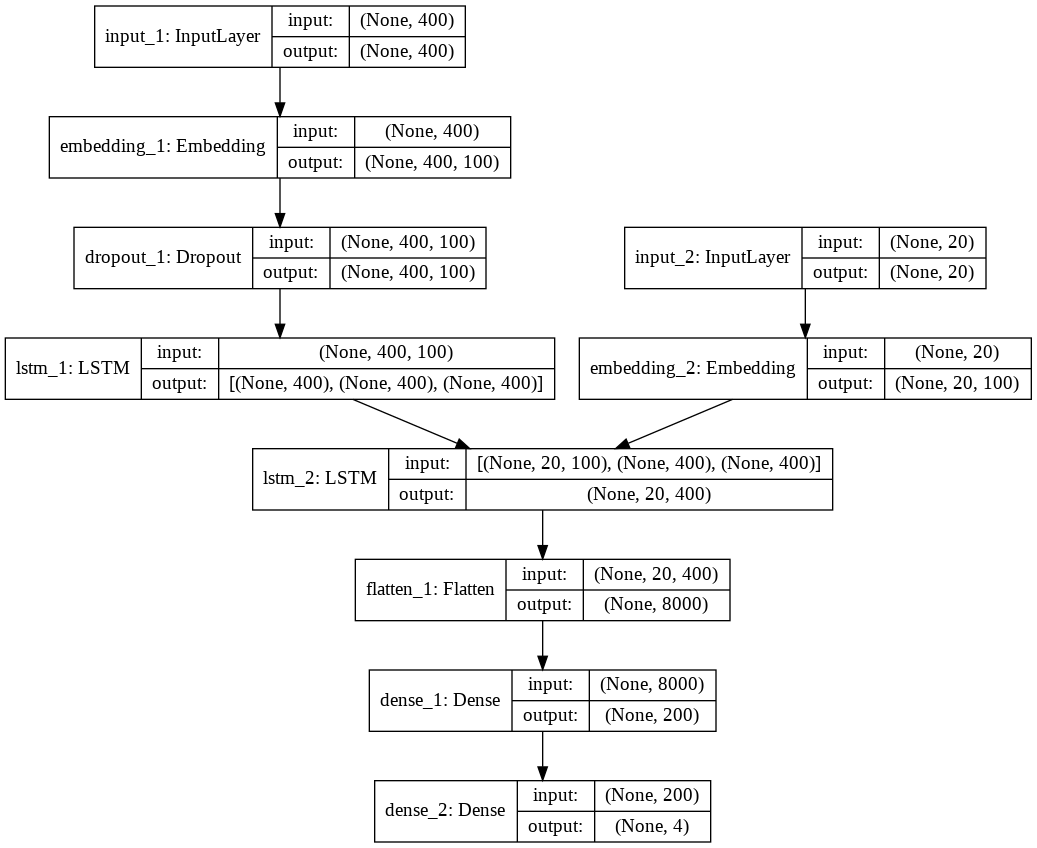

In [0]:
# Model is depicted that shows the input and output shapes of each layer
plot_model(model_1,to_file = 'model_2.png', show_shapes = True)

### Compile and fit the model

In [0]:
model_1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

Entire [[X_train, X_train_heading], y_train] used as the training data and the validation is done on the validation dataset [[X_val, X_heading_val], y_val] and callbacks defined earlier are used.

In [0]:
history = model_1.fit([X_train,X_heading_train],y_train, batch_size = 64, epochs= 20, validation_data = ([X_val,X_heading_val],y_val), callbacks = [checkpoints, reduce_lr,stop]).history

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 39978 samples, validate on 9994 samples
Epoch 1/20
39978/39978 [==============================] - 526s 13ms/step - loss: 0.7548 - acc: 0.7329 - val_loss: 0.7034 - val_acc: 0.7401
Epoch 2/20
39978/39978 [==============================] - 526s 13ms/step - loss: 0.6811 - acc: 0.7455 - val_loss: 0.6692 - val_acc: 0.7521
Epoch 3/20


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


39978/39978 [==============================] - 525s 13ms/step - loss: 0.6395 - acc: 0.7545 - val_loss: 0.6557 - val_acc: 0.7549
Epoch 4/20
39978/39978 [==============================] - 526s 13ms/step - loss: 0.6165 - acc: 0.7611 - val_loss: 0.6302 - val_acc: 0.7615
Epoch 5/20
39978/39978 [==============================] - 525s 13ms/step - loss: 0.6035 - acc: 0.7653 - val_loss: 0.6413 - val_acc: 0.7626
Epoch 6/20
39978/39978 [==============================] - 523s 13ms/step - loss: 0.5768 - acc: 0.7723 - val_loss: 0.6044 - val_acc: 0.7724
Epoch 7/20
39978/39978 [==============================] - 521s 13ms/step - loss: 0.5038 - acc: 0.7874 - val_loss: 0.4918 - val_acc: 0.7939
Epoch 8/20
39978/39978 [==============================] - 524s 13ms/step - loss: 0.4046 - acc: 0.8212 - val_loss: 0.4271 - val_acc: 0.8182
Epoch 9/20
39978/39978 [==============================] - 526s 13ms/step - loss: 0.3229 - acc: 0.8590 - val_loss: 0.3660 - val_acc: 0.8544
Epoch 10/20
39978/39978 [=============

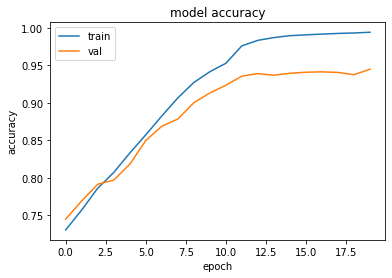

In [0]:
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model with SINGLE LSTM Layer in both Encoder and Decoder with Dropout layer for regularization is used.  This model gives 96.92% accuracy with the training set and 91.35% with the validation dataset

## Build the same model with attention layers included (Optional)

### MODELLING SINGLE LSTM LAYER IN BOTH ENCODER AND DECODER ALONG WITH ATTENTION MECHANISM

In [0]:
from keras import Model,Input
embedding_dim = 100
classes = 4

#Defining encoder sequence
seq_input1 = Input(shape = (maxlen_articlebody,), dtype = 'int32')
x = Embedding(MAX_NB_WORDS, embedding_dim, weights = [embedding_matrix], input_length = maxlen_articlebody,trainable = False)(seq_input1)
x = LSTM(200, return_sequences = True)(x)
x,state_c,state_h = (LSTM(200,return_state = True, return_sequences = True))(x)
encoder_states = [state_h,state_c]

#Defining attention layer
att_vector = TimeDistributed(Dense(1))(x)
att_vector = Reshape((maxlen_articlebody,))(att_vector)
att_vector = Activation('softmax', name='attention_vec')(att_vector)


#Defining Decoder sequence
seq_input2 = Input(shape = (maxlen_headline,),dtype = 'int32')
x = Embedding(MAX_NB_WORDS, embedding_dim, weights = [embedding_matrix],input_length = maxlen_headline, trainable = False)(seq_input2)
x = LSTM(200,return_sequences = True)(x,initial_state = encoder_states)
x = LSTM(200,return_sequences = True)(x)
x = Dense(20,activation = 'relu')(x)
x = Flatten()(x)
x = Dot(axes=1)([x,att_vector])
x = Dense(8000, activation = 'relu')(x)
x = Dense(200, activation = 'relu')(x)

output = (Dense(classes, activation = 'softmax'))(x)
model_3 = Model(inputs = [seq_input1,seq_input2], outputs = output)
model_3.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 400)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 400, 100)     3000000     input_3[0][0]                    
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
lstm_5 (LSTM)                   (None, 400, 200)     240800      embedding_3[0][0]                
____________________________________________________________________________________________

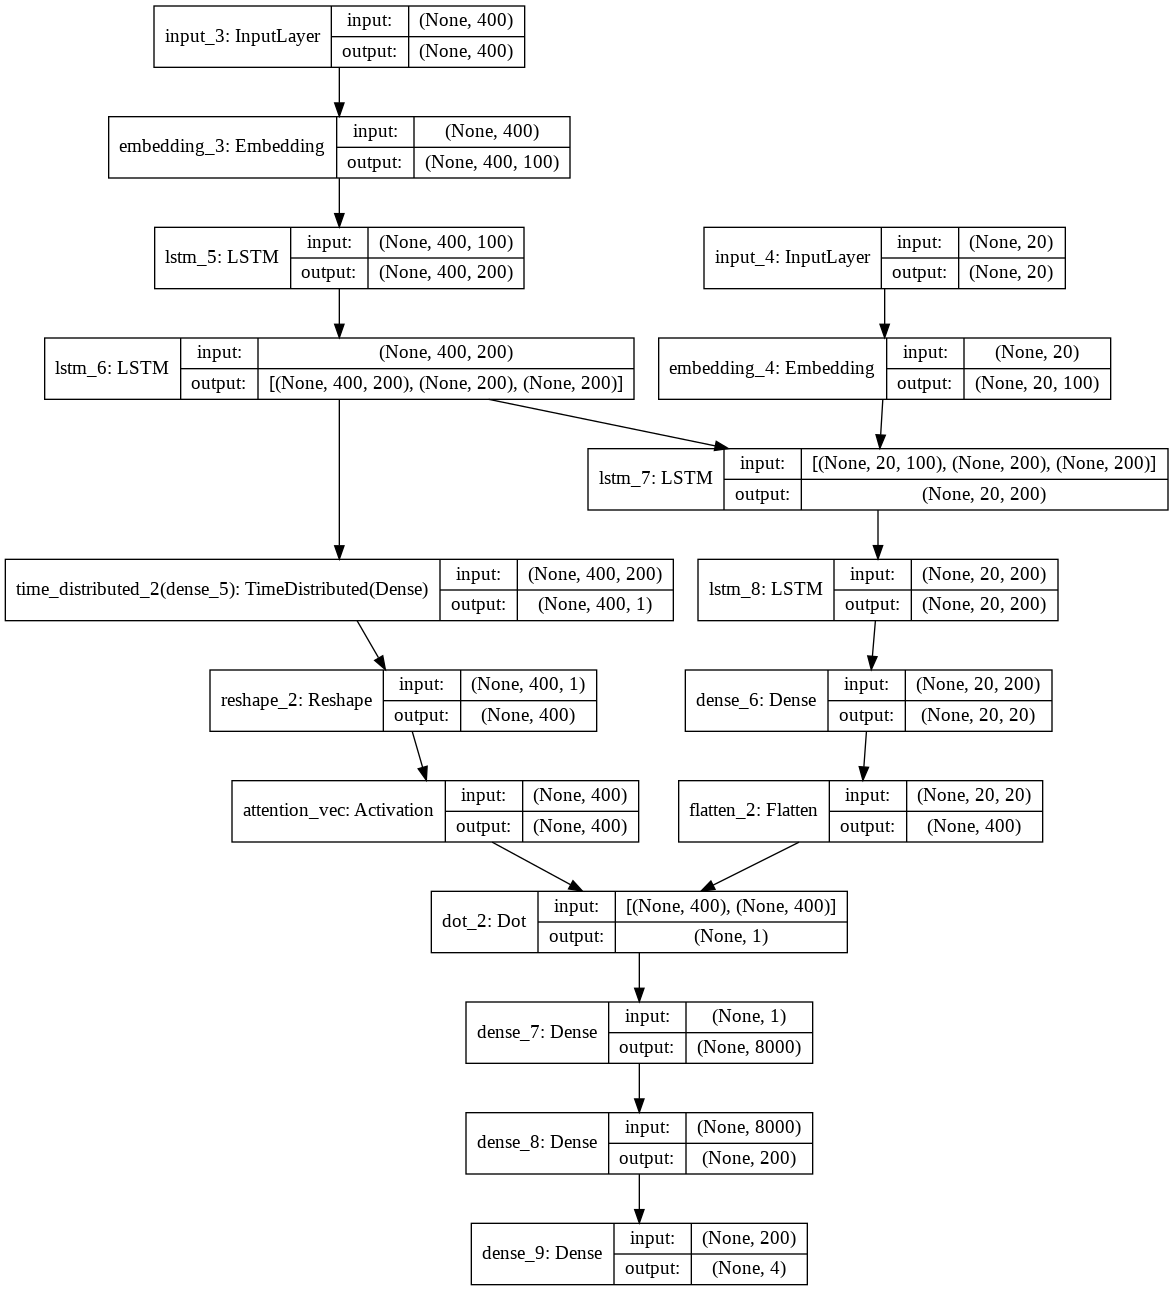

In [0]:
plot_model(model_3,to_file = 'model_2.png', show_shapes = True)

In [0]:
model_3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

## Fit the model and report the accuracy score for the model with attention layer (Optional)

In [0]:
history2 = model_3.fit([X_train,X_heading_train],y_train, batch_size = 64, epochs= 20, validation_data = ([X_val,X_heading_val],y_val), callbacks = [checkpoints, reduce_lr,stop]).history

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 39978 samples, validate on 9994 samples
Epoch 1/20
39978/39978 [==============================] - 764s 19ms/step - loss: 0.8000 - acc: 0.7304 - val_loss: 0.7968 - val_acc: 0.7308
Epoch 2/20
39978/39978 [==============================] - 769s 19ms/step - loss: 0.7501 - acc: 0.7314 - val_loss: 0.7242 - val_acc: 0.7308
Epoch 3/20


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


39978/39978 [==============================] - 776s 19ms/step - loss: 0.6983 - acc: 0.7314 - val_loss: 0.6827 - val_acc: 0.7390
Epoch 4/20
39978/39978 [==============================] - 780s 20ms/step - loss: 0.6343 - acc: 0.7511 - val_loss: 0.5923 - val_acc: 0.7755
Epoch 5/20
39978/39978 [==============================] - 785s 20ms/step - loss: 0.5607 - acc: 0.7866 - val_loss: 0.5872 - val_acc: 0.7813
Epoch 6/20
39978/39978 [==============================] - 799s 20ms/step - loss: 0.5032 - acc: 0.8088 - val_loss: 0.4899 - val_acc: 0.8164
Epoch 7/20
39978/39978 [==============================] - 799s 20ms/step - loss: 0.4509 - acc: 0.8303 - val_loss: 0.4802 - val_acc: 0.8192
Epoch 8/20
39978/39978 [==============================] - 765s 19ms/step - loss: 0.4088 - acc: 0.8434 - val_loss: 0.4578 - val_acc: 0.8265
Epoch 9/20
39978/39978 [==============================] - 761s 19ms/step - loss: 0.3736 - acc: 0.8570 - val_loss: 0.4275 - val_acc: 0.8420
Epoch 10/20
39978/39978 [=============

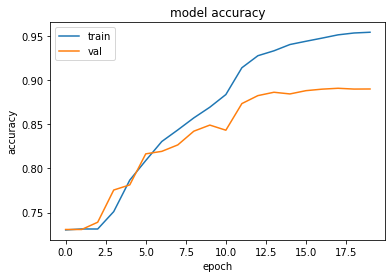

In [0]:
plt.plot(history2['acc'])
plt.plot(history2['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model with SINGLE LSTM Layer in both Encoder and Decoder with Attention Mechanism is used.  This model gives 95.39% accuracy with the training set and 88.97% with the validation dataset